In [1]:
import ROOT
from ROOT import gStyle

Welcome to JupyROOT 6.26/08


In [2]:
myFile_20 = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/DShaped/DShapedHoles_SiPMV3_2Chn0_3Chn1_edge/FILTERED/HcompassF_DShapedHoles_SiPMV3_2Chn0_3Chn1_edge_20230829_164422.root")

In [3]:
myFile_20.ls()

TFile**		/Users/bertabeltran/muon_data/data/DShaped/DShapedHoles_SiPMV3_2Chn0_3Chn1_edge/FILTERED/HcompassF_DShapedHoles_SiPMV3_2Chn0_3Chn1_edge_20230829_164422.root	
 TFile*		/Users/bertabeltran/muon_data/data/DShaped/DShapedHoles_SiPMV3_2Chn0_3Chn1_edge/FILTERED/HcompassF_DShapedHoles_SiPMV3_2Chn0_3Chn1_edge_20230829_164422.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title


In [4]:
dir_20 = myFile_20.GetDirectory("Energy");

In [5]:
dir_20.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


In [6]:
hist_20 = dir_20.Get("_F_EnergyCH0@DT5751_1615;1")
hist_20.Rebin(15)

In [7]:
hist_0 = dir_20.Get("_F_EnergyCH1@DT5751_1615")
hist_0.Rebin(15)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Info in <TCanvas::Print>: png file /Users/bertabeltran/muon_data/data/DShaped/SiPM_Pos_comp.png has been created


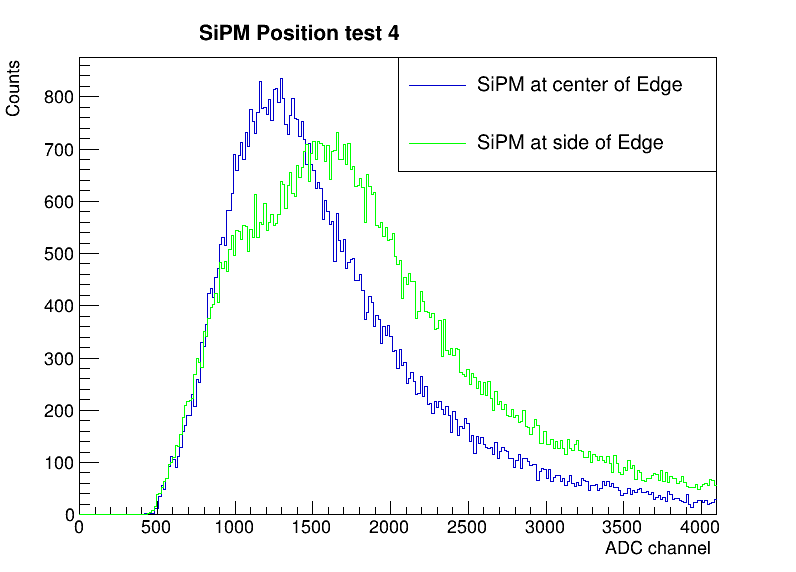

In [12]:

c = ROOT.TCanvas("myCanvasName","Scintillator with waveshifting fibre",800,600)


hist_20.SetFillColor(0)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)#
#hist_20.SetNormFactor(1)
hist_20.Draw()
hist_20.GetYaxis().SetTitleOffset(1.5) #1.2

hist_0.SetLineColor(3)
hist_0.SetFillColor(0)
#hist_0.SetNormFactor(1)
hist_0.Draw("same")
#c.SetLogy()
gStyle.SetOptStat(0)

leg = ROOT.TLegend(.5,.7,.9,.9)
leg.AddEntry(hist_20,"SiPM at center of Edge ","L")
leg.AddEntry(hist_0,"SiPM at side of Edge","L")
leg.Draw()

tex=ROOT.TLatex(0.25,0.93,"SiPM Position test 4");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c.Draw()
c.SaveAs("/Users/bertabeltran/muon_data/data/DShaped/SiPM_Pos_comp.png");